In [1]:
# Dependencies and Setup
import pandas as pd
import gmaps
import matplotlib.pyplot as plt
import numpy as np

# Google developer API key
from config import g_key

In [2]:
# File to Load 
traffic_file = "project_data.csv"

# Read Traffic File and Store into Pandas DataFrame
traffic_df = pd.read_csv(traffic_file)

traffic_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
0,9227453,10355,Povah Rd,122.229302,-17.929427,1/1/16,200.0,PDO Minor,Hit Object,NaN,0,0,0,0,0,0
1,9227808,1020997,Abernethy Rd,115.987176,-31.963001,1/1/16,0.0,PDO Major,Hit Object,NaN,0,0,0,0,0,0


In [3]:
# File to Load 
speedlimit_file = "Legal_Speed_Limits.csv"

# Read Traffic File and Store into Pandas DataFrame
speedlimit_df = pd.read_csv(speedlimit_file)

# Rename "ROAD" column to "ROAD_NO" to have similar column names in both DataFrames
speedlimit_df=speedlimit_df.rename(columns={"ROAD":"ROAD_NO"})
speedlimit_df.head(2)

,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,47167919,2110042,Hacket Rd,Hacket Rd,0.0,1.15,Single,0.0,1.15,Local Road,2,South West,211,Harvey,50km/h applies in built up areas or 110km/h ou...,218243,0.010896
1,47167920,1071273,Gypsum Cove,Gypsum Cove,0.0,0.12,Single,0.0,0.12,Local Road,7,Metropolitan,107,Rockingham (C),50km/h applies in built up areas or 110km/h ou...,218228,0.001073


In [4]:
# Removing Property Damage(PDO) from Traffic DataFrame
traffic_df=traffic_df.loc[(traffic_df["SEVERITY"]=="Fatal")|(traffic_df["SEVERITY"]=="Hospital")\
    |(traffic_df["SEVERITY"]=="Medical")]
traffic_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED
2,9237537,1080305,Ray Cl,116.019921,-32.214429,1/1/16,1910.0,Medical,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1
6,9223563,H028,Karrinyup Morley Hwy,115.896111,-31.887870,1/1/16,1750.0,Medical,Right Angle,NaN,0,0,0,0,2,0


## Merging two DataFrames

In [5]:
# Dropping the duplicate roads in speedlimit DataFrame
clean_speedlimit_df = speedlimit_df.drop_duplicates(["ROAD_NO"])

# Merging two dataframes
merged_df = pd.merge(traffic_df, clean_speedlimit_df, how="left", on="ROAD_NO", validate="many_to_one")
merged_df.head(2)

,ACC_ID,ROAD_NO,ROAD_NAME_x,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,...,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
0,9237537,1080305,Ray Cl,116.019921,-32.214429,1/1/16,1910.0,Medical,Hit Pedestrian,Involving Pedestrian,...,0.00,0.32,Local Road,7.0,Metropolitan,108.0,Serpentine - Jarrahdale,50km/h applies in built up areas or 110km/h ou...,235416.0,0.003151
1,9223563,H028,Karrinyup Morley Hwy,115.896111,-31.887870,1/1/16,1750.0,Medical,Right Angle,NaN,...,1.04,1.79,State Road,7.0,Metropolitan,125.0,Stirling (C),60km/h,247747.0,0.007970


In [6]:
# Cleaning merged dataframe
merged_df=merged_df[["ROAD_NO","SPEED_LIMIT","LONGITUDE","LATITUDE","CRASH_DATE","CRASH_TIME","SEVERITY", \
    "TOTAL_BIKE_INVOLVED", "TOTAL_TRUCK_INVOLVED","TOTAL_HEAVY_TRUCK_INVOLVED","TOTAL_MOTOR_CYCLE_INVOLVED", \
        "TOTAL_OTHER_VEHICLES_INVOLVED", "TOTAL_PEDESTRIANS_INVOLVED"]]

clean_merged_df=merged_df.loc[merged_df["SPEED_LIMIT"]!= \
    "50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_merged_df["SPEED_LIMIT"]=clean_merged_df["SPEED_LIMIT"].str.replace("km/h"," ").astype(float) 
clean_merged_df["CRASH_YEAR"]=clean_merged_df["CRASH_DATE"].str.split("/",expand=True)[2].astype(float)

clean_merged_df.to_csv("merged_df.csv")
clean_merged_df.head(2)

C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nassim\anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,ROAD_NO,SPEED_LIMIT,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,CRASH_YEAR
1,H028,60.0,115.896111,-31.88787,1/1/16,1750.0,Medical,0,0,0,0,2,0,16.0
3,1250050,60.0,115.885511,-31.92174,1/1/16,1340.0,Medical,0,0,0,0,2,0,16.0


In [7]:
# Cleaning speedlimit DataFrame
clean_speedlimit_df=clean_speedlimit_df.loc[clean_speedlimit_df["SPEED_LIMIT"]!= \
    "50km/h applies in built up areas or 110km/h outside built up areas"]

# Convert SPEED_LIMIT column from object to float
clean_speedlimit_df["SPEED_LIMIT"]=clean_speedlimit_df["SPEED_LIMIT"].str.replace("km/h"," ").astype(float)
clean_speedlimit_df.head(2)

,OBJECTID,ROAD_NO,ROAD_NAME,COMMON_USAGE_NAME,START_SLK,END_SLK,CWY,START_TRUE_DIST,END_TRUE_DIST,NETWORK_TYPE,RA_NO,RA_NAME,LG_NO,LG_NAME,SPEED_LIMIT,ROUTE_NE_ID,GEOLOCSTLength
52855,47220774,1180262,Douglas St,Douglas St,0.0,0.12,Single,0.0,0.12,Local Road,7,Metropolitan,118,Fremantle (C),10.0,212440,0.001244
52857,47220776,1290202,Lathlain Pl,Lathlain Pl,0.0,0.10,Left,0.0,0.10,Local Road,7,Metropolitan,129,Victoria Park (T),20.0,224547,0.000975


## Number of WA roads per speed limit

In [8]:
# Total number of roads in WA per speed limit
WA_roads_per_speedlimit = clean_speedlimit_df["SPEED_LIMIT"].value_counts().sort_index()
WA_roads_per_speedlimit=WA_roads_per_speedlimit.loc[WA_roads_per_speedlimit.index>40]

total_WA_roads = WA_roads_per_speedlimit.sum()

WA_roads_fraction = WA_roads_per_speedlimit/total_WA_roads
# Removing roads with speedlimit < 50km/h
WA_roads_fraction = WA_roads_fraction.loc[WA_roads_fraction.index>40].sort_index()
WA_roads_per_speedlimit

50.0     5122
60.0      975
70.0      731
80.0      181
90.0       33
100.0      15
110.0      86
Name: SPEED_LIMIT, dtype: int64

In [9]:
sum_roads=WA_roads_per_speedlimit.sum()
road_proportion=round(WA_roads_per_speedlimit/sum_roads,3)
road_count_df=pd.DataFrame({"Count of Roads":WA_roads_per_speedlimit})
road_count_df.index=road_count_df.index.astype(int).rename("Speed Limit [km/h]")
road_count_df

,Count of Roads
Speed Limit [km/h],
50,5122
60,975
70,731
80,181
90,33
100,15
110,86


## Number of WA Accidents per SpeedLimit

In [10]:
# Count number of accidents per speed limit
accident_count_per_speedlimit=clean_merged_df["SPEED_LIMIT"].value_counts()

# Remove speed limits below 50km/h
accident_count_per_speedlimit=accident_count_per_speedlimit.loc[accident_count_per_speedlimit.index>40].sort_index()
accident_count_per_speedlimit

50.0     1700
60.0     9790
70.0     3746
80.0     1550
90.0       42
100.0      25
110.0      54
Name: SPEED_LIMIT, dtype: int64

In [11]:
sum_accidents=accident_count_per_speedlimit.sum()
accident_proportion=round(accident_count_per_speedlimit/sum_accidents,3)
accident_count_df=pd.DataFrame({"Count of Accidents":accident_count_per_speedlimit, "Proportion of Accidents":accident_proportion})
accident_count_df.index=accident_count_df.index.astype(int).rename("Speed Limit [km/h]")
accident_count_df

,Count of Accidents,Proportion of Accidents
Speed Limit [km/h],,
50,1700,0.101
60,9790,0.579
70,3746,0.222
80,1550,0.092
90,42,0.002
100,25,0.001
110,54,0.003


## Total number of accidents per road for each speed limit

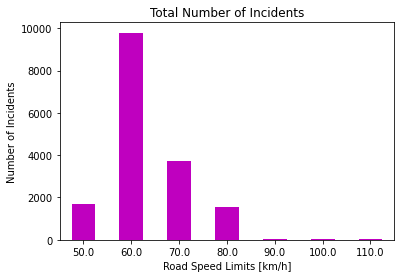

In [12]:
total_accidents_per_speedlimit=accident_count_per_speedlimit
total_accidents_per_speedlimit.plot(kind="bar",title="Total Number of Incidents", rot=0,color="m")
plt.ylabel("Number of Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

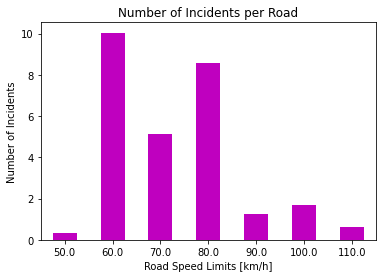

In [13]:
normalised_accidents_per_speedlimit=accident_count_per_speedlimit/WA_roads_per_speedlimit
normalised_accidents_per_speedlimit.plot(kind="bar", title="Number of Incidents per Road",rot=0,color="m")
plt.ylabel("Number of Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

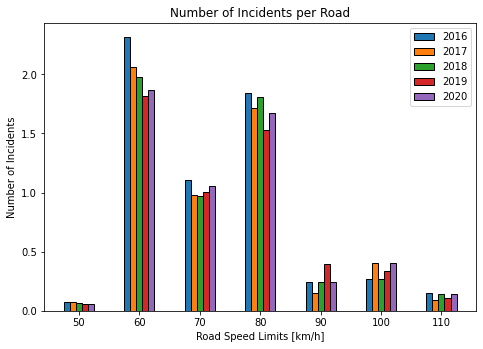

In [26]:
# Count number of accidents per speed limit & remove speed limits below 50km/h
data_accidents16=clean_merged_df.loc[(clean_merged_df["CRASH_YEAR"]==16)&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit
data_accidents17=clean_merged_df.loc[(clean_merged_df["CRASH_YEAR"]==17)&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit
data_accidents18=clean_merged_df.loc[(clean_merged_df["CRASH_YEAR"]==18)&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit
data_accidents19=clean_merged_df.loc[(clean_merged_df["CRASH_YEAR"]==19)&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit
data_accidents20=clean_merged_df.loc[(clean_merged_df["CRASH_YEAR"]==20)&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit

data_accidents=[data_accidents16,data_accidents17,data_accidents18,data_accidents19,data_accidents20]
year=np.arange(2016,2021,1)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(data_accidents[0].index-2,data_accidents[0],width = 1,edgecolor="black")
ax.bar(data_accidents[1].index-1,data_accidents[1],width = 1,edgecolor="black")
ax.bar(data_accidents[2].index+0,data_accidents[2],width = 1,edgecolor="black")
ax.bar(data_accidents[3].index+1,data_accidents[3],width = 1,edgecolor="black")
ax.bar(data_accidents[4].index+2,data_accidents[4],width = 1,edgecolor="black")
ax.legend(labels=year)

plt.title("Number of Incidents per Road")
plt.ylabel("Number of Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Fatal Accident Analysis

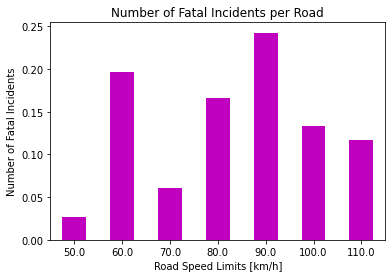

In [14]:
# Remove speed limits below 50km/h
fatal_accidents=clean_merged_df.loc[(clean_merged_df["SEVERITY"]=="Fatal")&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit
fatal_accidents

fatal_accidents.plot(kind="bar", rot=0, color="m")
plt.title("Number of Fatal Incidents per Road")
plt.ylabel("Number of Fatal Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Hospital Accident Analysis

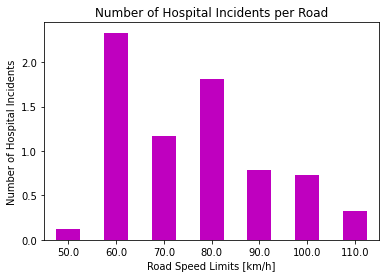

In [15]:
# Remove speed limits below 50km/h
hospital_accidents=clean_merged_df.loc[(clean_merged_df["SEVERITY"]=="Hospital")&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit

# Plot the Number of Fatal Accidents

hospital_accidents.plot(kind="bar", rot=0,color="m")
plt.title("Number of Hospital Incidents per Road")
plt.ylabel("Number of Hospital Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Medical Accident Analysis

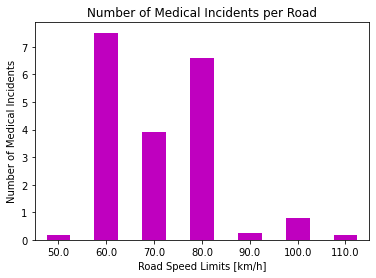

In [16]:
# Remove speed limits below 50km/h
medical_accidents=clean_merged_df.loc[(clean_merged_df["SEVERITY"]=="Medical")&(clean_merged_df["SPEED_LIMIT"]>40)] \
    ["SPEED_LIMIT"].value_counts().sort_index()/WA_roads_per_speedlimit

# Plot the Number of Fatal Accidents

medical_accidents.plot(kind="bar", rot=0 ,color="m")
plt.title("Number of Medical Incidents per Road")
plt.ylabel("Number of Medical Incidents")
plt.xlabel("Road Speed Limits [km/h]")
plt.show()

## Fatal Driving Accidents on Google Maps

In [17]:
# Location of Fatal Accidents for Specific Year
traffic_df["CRASH_YEAR"]=traffic_df["CRASH_DATE"].str.split("/",expand=True)[2].astype(float)

fatal_accident_df=traffic_df.loc[(traffic_df["SEVERITY"]=="Fatal")&(traffic_df["CRASH_YEAR"]==20)]
locations=fatal_accident_df[["LATITUDE", "LONGITUDE"]]

In [18]:
# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(locations, fill_color="red", fill_opacity=0.3,stroke_color="red", stroke_opacity=0.3)


fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [19]:
# Total Number of Fatal Accidents per Year
traffic_df["CRASH_YEAR"]=traffic_df["CRASH_DATE"].str.split("/",expand=True)[2].astype(float)
traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"]["CRASH_YEAR"].value_counts().sort_index()
traffic_df



,ACC_ID,ROAD_NO,ROAD_NAME,LONGITUDE,LATITUDE,CRASH_DATE,CRASH_TIME,SEVERITY,EVENT_NATURE,EVENT_TYPE,TOTAL_BIKE_INVOLVED,TOTAL_TRUCK_INVOLVED,TOTAL_HEAVY_TRUCK_INVOLVED,TOTAL_MOTOR_CYCLE_INVOLVED,TOTAL_OTHER_VEHICLES_INVOLVED,TOTAL_PEDESTRIANS_INVOLVED,CRASH_YEAR
2,9237537,1080305,Ray Cl,116.019921,-32.214429,1/1/16,1910.0,Medical,Hit Pedestrian,Involving Pedestrian,0,0,0,0,1,1,16.0
6,9223563,H028,Karrinyup Morley Hwy,115.896111,-31.887870,1/1/16,1750.0,Medical,Right Angle,NaN,0,0,0,0,2,0,16.0
7,9223962,3021045,Admiral St,117.857101,-35.004132,1/1/16,1900.0,Hospital,Rear End,Involving Parking,0,0,0,0,2,0,16.0
8,9224038,1250050,Beaufort St,115.885511,-31.921740,1/1/16,1340.0,Medical,Right Angle,NaN,0,0,0,0,2,0,16.0
9,9224232,H018,Roe Hwy,116.028310,-31.886042,1/1/16,130.0,Hospital,Right Turn Thru,NaN,0,0,0,0,2,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136622,10364829,6040114,Eleven Mile Beach Rd,121.838993,-33.853439,30/12/20,45.0,Hospital,Non Collision,NaN,0,0,0,0,1,0,20.0
136656,10380405,5150061,Weir Rd,115.918145,-29.466859,31/12/20,2235.0,Hospital,Non Collision,NaN,0,0,0,0,1,0,20.0
136673,10421350,H009,South Western Hwy,117.349191,-34.962397,31/12/20,1030.0,Medical,Rear End,NaN,0,0,0,0,2,0,20.0
136674,10430488,1300280,Fitzgerald St,115.855339,-31.941352,31/12/20,540.0,Medical,Non Collision,NaN,0,0,0,0,1,0,20.0


## Symbol Map of Accidents involving Pedestrians

In [20]:
pedestrian_df=traffic_df.loc[(traffic_df["TOTAL_PEDESTRIANS_INVOLVED"]!=0)&(traffic_df["CRASH_YEAR"]==20) \
    & (traffic_df["SEVERITY"]=="Fatal")]

pedestrian_locations=pedestrian_df[["LATITUDE", "LONGITUDE"]]

# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(pedestrian_locations, fill_color="red", fill_opacity=0.3,stroke_color="red", stroke_opacity=0.3)


fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Symbol Map of Accidents involving Bikes

In [21]:
bike_df=traffic_df.loc[(traffic_df["TOTAL_BIKE_INVOLVED"]!=0) & (traffic_df["CRASH_YEAR"]==20) \
    & (traffic_df["SEVERITY"]=="Fatal")]

# bike_df=traffic_df.loc[(traffic_df["TOTAL_BIKE_INVOLVED"]!=0) & (traffic_df["SEVERITY"]=="Fatal")]

bike_locations=bike_df[["LATITUDE", "LONGITUDE"]]

# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '800px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(bike_locations, fill_color="red", fill_opacity=0.4,stroke_color="red", stroke_opacity=0.4)


fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## Symbol Map of Accidents involving Motorcycles

In [22]:
motorcycle_df=traffic_df.loc[(traffic_df["TOTAL_MOTOR_CYCLE_INVOLVED"]!=0) & (traffic_df["CRASH_YEAR"]==20) \
    & (traffic_df["SEVERITY"]=="Fatal")]

# motorcycle_df=traffic_df.loc[(traffic_df["TOTAL_MOTOR_CYCLE_INVOLVED"]!=0) & (traffic_df["SEVERITY"]=="Fatal")]

motorcycle_locations=motorcycle_df[["LATITUDE", "LONGITUDE"]]

# Configure gmaps
gmaps.configure(api_key=g_key)

figure_layout = {
    'width': '400px',
    'height': '300px',
    'border': '1px solid black',
    'padding': '1px',
    'margin': '0 auto 0 auto'
}

fig = gmaps.figure()

fig = gmaps.figure(layout=figure_layout)
fig = gmaps.figure(center=(-33,117), zoom_level=7)


# Assign the marker layer to a variable
symbols = gmaps.symbol_layer(motorcycle_locations, fill_color="red", fill_opacity=0.4,stroke_color="red", stroke_opacity=0.4)


fig.add_layer(symbols)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

## The most common causes of accidents

In [23]:
bike_involved=traffic_df.groupby(["CRASH_YEAR"])["TOTAL_BIKE_INVOLVED"].sum()
heavy_truck_involved=traffic_df.groupby(["CRASH_YEAR"])["TOTAL_HEAVY_TRUCK_INVOLVED"].sum()
motorcycle_involved=traffic_df.groupby(["CRASH_YEAR"])["TOTAL_MOTOR_CYCLE_INVOLVED"].sum()
pedestrian_involved=traffic_df.groupby(["CRASH_YEAR"])["TOTAL_PEDESTRIANS_INVOLVED"].sum()
other_vehicle_involved=traffic_df.groupby(["CRASH_YEAR"])["TOTAL_OTHER_VEHICLES_INVOLVED"].sum()

accident_cause_df=pd.DataFrame({"Bike":bike_involved,"Heavy Truck":heavy_truck_involved, \
    "Motorcycle":motorcycle_involved, "Pedestrian":pedestrian_involved, "Other Vehicles":other_vehicle_involved})

accident_cause_df.index=accident_cause_df.index.astype(int).rename("YEAR")
accident_cause_df

,Bike,Heavy Truck,Motorcycle,Pedestrian,Other Vehicles
YEAR,,,,,
16,255,97,548,268,9600
17,278,71,568,328,8460
18,216,93,457,267,7872
19,219,69,460,238,7744
20,238,84,448,218,8109


In [24]:
fatal_bike=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"].groupby(["CRASH_YEAR"])["TOTAL_BIKE_INVOLVED"].sum()
fatal_heavy_truck=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"].groupby(["CRASH_YEAR"])["TOTAL_HEAVY_TRUCK_INVOLVED"].sum()
fatal_motorcycle=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"].groupby(["CRASH_YEAR"])["TOTAL_MOTOR_CYCLE_INVOLVED"].sum()
fatal_pedestrian=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"].groupby(["CRASH_YEAR"])["TOTAL_PEDESTRIANS_INVOLVED"].sum()
fatal_other_vehicle=traffic_df.loc[traffic_df["SEVERITY"]=="Fatal"].groupby(["CRASH_YEAR"])["TOTAL_OTHER_VEHICLES_INVOLVED"].sum()

accident_cause_df=pd.DataFrame({"Bike":fatal_bike,"Heavy Truck":fatal_heavy_truck, \
    "Motorcycle":fatal_motorcycle, "Pedestrian":fatal_pedestrian, "Other Vehicles":fatal_other_vehicle})

accident_cause_df.index=accident_cause_df.index.astype(int).rename("YEAR")
accident_cause_df

,Bike,Heavy Truck,Motorcycle,Pedestrian,Other Vehicles
YEAR,,,,,
16,5,15,40,13,168
17,9,15,30,17,153
18,5,13,31,19,144
19,1,11,36,17,152
20,5,9,28,9,135


In [25]:
bike=traffic_df.loc[traffic_df["TOTAL_BIKE_INVOLVED"]!=0]["ACC_ID"].count()
heavy_truck=traffic_df.loc[traffic_df["TOTAL_HEAVY_TRUCK_INVOLVED"]!=0]["ACC_ID"].count()
motorcycle=traffic_df.loc[traffic_df["TOTAL_MOTOR_CYCLE_INVOLVED"]!=0]["ACC_ID"].count()
pedestrian=traffic_df.loc[traffic_df["TOTAL_PEDESTRIANS_INVOLVED"]!=0]["ACC_ID"].count()
other_vehicle=traffic_df.loc[traffic_df["TOTAL_OTHER_VEHICLES_INVOLVED"]!=0]["ACC_ID"].count()

# accident_cause_df=pd.DataFrame({"Bike":bike,"Heavy Truck":heavy_truck, \
#     "Motorcycle":motorcycle, "Pedestrian":pedestrian, "Other Vehicles":other_vehicle})
index=["Bikes","Heavy Trucks","Motorcycles","Pedestrians","Other Vehicles"]
crash_list=[bike,heavy_truck,motorcycle,pedestrian,other_vehicle]
# percent_list=[round((x/25453),2) for x in crash_list]
accident_cause_df=pd.DataFrame({"Number of Incidents":crash_list},index=index)

# # # accident_cause_df.index=accident_cause_df.index.astype(int).rename("YEAR")
# # accident_cause_df
accident_cause_df


,Number of Incidents
Bikes,1152
Heavy Trucks,394
Motorcycles,2403
Pedestrians,1234
Other Vehicles,23560
